#  Customer Campaign Response Prediction: Enhancing Marketing Efficiency

Strategic exploration of predictive modeling in the domain of marketing analytics. In an increasingly competitive and data-saturated marketplace, it is essential for organizations to transition from reactive marketing approaches to highly targeted, data-driven campaign execution.

This project aims to construct a robust classification model capable of predicting individual customer responses to future marketing campaigns. By leveraging rich historical data encompassing demographics, purchase behavior, and previous campaign engagement, the model enables precise segmentation and personalized targeting.

Our objective is twofold: first, to uncover underlying patterns in consumer data that signify likelihood of engagement; and second, to operationalize those insights into actionable strategies that increase conversion rates, reduce customer churn, and maximize return on investment (ROI). We further augment this analysis with behavioral insights and, where applicable, sentiment orientation to extract deeper emotional drivers of consumer response.


###  Business Problem: The Challenge of Effective Marketing

Marketing departments today operate under intense pressure to deliver measurable outcomes. Mass communication tactics often fall short due to their inefficiency, lack of personalization, and inability to adapt to individual customer profiles. As a result, organizations face the following operational bottlenecks:

- **Wasted Marketing Spend:** Non-targeted messaging leads to outreach that doesn’t convert—wasting both budget and resources.
- **Customer Fatigue:** Repeated and irrelevant messaging results in customer disengagement, unsubscribes, and potential brand aversion.
- **Missed Opportunities:** Without intelligent segmentation, businesses overlook high-value prospects who are ready to convert.
- **Suboptimal ROI:** When marketing lacks data-driven targeting, it fails to generate proportional value from campaign investments.

####  Project Objective

To address these challenges, our project sets out to develop a machine learning classification model that forecasts customer responsiveness to marketing campaigns *prior to execution*. The resulting insights empower organizations to:

-  **Personalize Communication**
-  **Enhance Campaign Efficiency**
-  **Reduce Operational Costs**
-  **Boost Customer Satisfaction**
-  **Improve ROI**


Data Understanding: Diving into Customer Insights

Our analysis is grounded in the `marketing_campaign.csv` dataset (sourced from Kaggle: [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)). The dataset provides a multifaceted view of customer profiles, marketing interactions, and purchase history—making it well-suited for predictive analytics in a real-world business context.

####  Key Variables

| **Feature**           | **Description** |
|------------------------|-----------------|
| `ID` | Unique identifier for each customer (excluded from modeling) |
| `Year_Birth` | Customer birth year, used to derive age |
| `Education` | Categorical feature representing education level (e.g., Graduation, PhD, Master) |
| `Marital_Status` | Categorical marital status (e.g., Single, Married, Divorced, YOLO) |
| `Income` | Household annual income (numeric) |
| `Kidhome`, `Teenhome` | Number of children and teenagers in the household |
| `Dt_Customer` | Date of customer enrollment (used for tenure derivation) |
| `Recency` | Days since last purchase—key indicator of engagement |
| `MntWines`, ..., `MntGoldProds` | Monetary value spent on different product categories |
| `NumDealsPurchases` | Number of discounted purchases (price sensitivity proxy) |
| `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` | Channel-based purchase frequency |
| `NumWebVisitsMonth` | Web visits in the last month (online engagement proxy) |
| `AcceptedCmp1` to `AcceptedCmp5` | Binary flags showing responses to past campaigns |
| `Complain` | Binary indicator for customer complaints (service dissatisfaction) |
| `Z_CostContact`, `Z_Revenue` | Constant values (dropped from analysis) |
| `Response` | **Target variable** — binary label indicating whether the customer responded to the most recent campaign (`1`) or not (`0`) |

####  Class Imbalance Alert

Initial exploratory analysis reveals that the `Response` variable is heavily imbalanced, with far more non-responders than responders. This is typical of marketing datasets and introduces modeling challenges. We therefore place strong emphasis on **precision**, **recall**, **F1-score**, and **ROC-AUC**—as these metrics provide a more truthful measure of performance than accuracy alone in skewed datasets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-v0_8-darkgrid')
from sklearn.metrics import    classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve

In [2]:
# Load the dataset\n",
df = pd.read_csv('marketing_campaign.csv', sep='\\t')

# Display basic information about the dataset to verify loading and initial structure\n",
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8340\2720439075.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('marketing_campaign.csv', sep='\\t')


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Preprocessing: Preparing Data for Machine Learning.
Raw data is rarely in a state ready for direct machine learning model training. The preprocessing phase involves a series of transformations to clean, engineer, and scale the data, ensuring it is in an optimal format for our models to learn effectively. This step is critical for model performance and interpretability.

Here are the specific preprocessing steps applied:

1.  Handling Missing Values in `Income`: The `Income` column was identified as having missing values. To prevent errors during model training and to ensure all customer records can be used, these missing values are imputed. We use the **mean income** as a robust imputation strategy, as it preserves the overall income distribution.

2.  Feature Engineering: Calculating `Age`: The `Year_Birth` column, while informative, is less directly useful than a customer's `Age`. We calculate `Age` by subtracting `Year_Birth` from a reference year (2014, chosen based on the latest date in `Dt_Customer` to reflect campaign relevance). This transforms a historical date into a direct demographic feature.

3.  Removing Irrelevant or Redundant Columns:

     * `ID`: A unique identifier that holds no predictive power for customer response.

     * `Year_Birth`: Redundant after `Age` has been engineered.

     * `Dt_Customer`: While useful for deriving tenure, its direct format is not conducive for modeling, and we've already used it to determine our reference year for age calculation.


     * `Z_CostContact` and `Z_Revenue`: These columns contain constant values, meaning they do not vary across customers and thus cannot contribute to differentiating between responders and non-responders. Including them would only add noise.

Removing these columns streamlines the dataset and reduces dimensionality.


4.  One-Hot Encoding Categorical Variables: Machine learning algorithms primarily work with numerical data. `Education` and `Marital_Status` are categorical features with distinct string values. We apply **one-hot encoding** to convert these into a numerical format, creating new binary columns for each unique category. For instance, 'Education\_Graduation', 'Education\_PhD', etc., will become new columns with 1s or 0s. `drop_first=True` is used to avoid multicollinearity.
    
5.  Separating Features (X) and Target (y): The dataset is explicitly divided into two parts: `X` (the feature matrix containing all independent variables used for prediction) and `y` (the target vector, which is `Response` in this case).

6.  Data Splitting: Training and Testing Sets: To evaluate our models objectively, the data is split into `X_train`, `X_test`, `y_train`, and `y_test`. A **75-25 split** (75% for training, 25% for testing) is a common practice. Crucially, `stratify=y` is used during this split. This ensures that the proportion of responders (Class 1) and non-responders (Class 0) is maintained in both the training and testing sets, which is vital given the class imbalance in our `Response` variable.
    
7.  Feature Scaling with `StandardScaler`: Many machine learning algorithms are sensitive to the scale of input features. Features with larger numerical ranges (e.g., `Income`, `MntWines`) can disproportionately influence the model compared to features with smaller ranges. `StandardScaler` transforms the features so that they have a **mean of 0 and a standard deviation of 1**. This normalization process prevents features with larger magnitudes from dominating the learning process, leading to more robust model performance.

# Handle missing values in 'Income' by imputing with the mean.

In [3]:

df['Income'].fillna(df['Income'].mean(), inplace=True)

# Feature Engineering: Calculate Age (current year is 2014 for age calculation, based on Dt_Customer range)

In [4]:
df['Age'] = 2014 - df['Year_Birth']

# Drop original 'Year_Birth' and other identified irrelevant columns

In [5]:
df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# One-hot encode categorical variables: 'Education' and 'Marital_Status'

In [6]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Separate features (X) and target (y)

In [7]:
X = df.drop('Response', axis=1)
y = df['Response']

# Verify class imbalance in the target variable

In [8]:
y.value_counts(normalize=True)

Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64

# Split data into training and testing sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Scale numerical features

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## OOP Classifier and Evaluation Utility: Streamlining Model Assessment

To ensure consistency and efficiency in evaluating different machine learning models, an object-oriented `BaseClassifier` utility class has been developed. This class encapsulates the common functionalities of model training and evaluation, making it easy to compare various algorithms.\n",
    
The `BaseClassifier` class provides the following capabilities:
    

* Initialization (`__init__`): Takes a scikit-learn model object (e.g., `SGDClassifier`, `DecisionTreeClassifier`) and a `model_name` string. This allows for clear identification of the model being evaluated.\n",
    

* Training (`train` method): Fits the encapsulated model to the provided training data (`X`, `y`). This standardizes the model fitting process.


* Evaluation (`evaluate` method): This is the core of the utility. It performs several critical steps:



* Prediction: Generates binary predictions (`y_pred`) and, if the model supports it, probability predictions (`y_proba`) for the positive class on the test set.

* Metric Calculation:** Prints a comprehensive set of classification metrics, including:
            
     * `classification_report`: Provides precision, recall, and F1-score for both classes, along with support and accuracy.
            
     * `Accuracy`:** The proportion of correctly classified instances (overall correct predictions).
            
     * `Precision` (for Class 1): Of all instances predicted as positive (responders), what proportion were actually positive. High precision minimizes false positives (sending offers to uninterested customers).
            
     * `Recall` (for Class 1): Of all actual positive instances (responders), what proportion were correctly identified. High recall minimizes false negatives (missing out on potential responders).
            
     * `F1 Score` (for Class 1): The harmonic mean of precision and recall. It's particularly useful for imbalanced datasets as it provides a single metric that balances both false positives and false negatives. Our primary evaluation metric due to the `Response` class imbalance.
            
     * `ROC AUC` (Receiver Operating Characteristic Area Under the Curve):** Measures the model's ability to distinguish between the positive and negative classes across various probability thresholds. A higher AUC indicates better discriminatory power.

* Visualization: Generates two crucial plots for visual assessment:
            
* ROC Curve: Plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. The curve's proximity to the top-left corner indicates better performance. The AUC value is displayed on the plot.

* Confusion Matrix: A table that visualizes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives, providing a clear breakdown of where the model is succeeding and failing.
    
This standardized evaluation approach ensures fair comparison between models and provides a holistic view of their performance, especially critical when dealing with imbalanced datasets where a single metric like accuracy can be misleading.

In [11]:
class BaseClassifier:
    def __init__(self, model, model_name="Model"):
        self.model = model
        self.name = model_name

    def train(self, X, y):
        self.model.fit(X, y)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        y_proba = self.model.predict_proba(X_test)[:, 1] if hasattr(self.model, 'predict_proba') else None

        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print(f"Precision: {precision_score(y_test, y_pred):.2f}")
        print(f"Recall: {recall_score(y_test, y_pred):.2f}")
        print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    
        if y_proba is not None:
            roc_auc = roc_auc_score(y_test, y_proba)
            print(f"ROC AUC: {roc_auc:.2f}")
                     
            # Plot ROC Curve\n",
            plt.figure(figsize=(8, 6))
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, label=f'{self.name} (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
            plt.title(f"{self.name} - ROC Curve")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Plot Confusion Matrix for the Baseline model
            plt.figure(figsize=(6, 5))
            ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
            plt.title(f"{self.name} - Confusion Matrix")
            plt.grid(False)
            plt.show()

## Model Training and Evaluation: Benchmarking Performance
With the data prepared and our evaluation utility in place, we proceed to train and assess the performance of three distinct classification models. The objective is to identify the most effective model for predicting customer campaign response, with a particular focus on the F1-score due to the class imbalance in our target variable (`Response`)

We will evaluate:
1.  Logistic Regression (SGD): A linear, interpretable model serving as our baseline.

2.  Untuned Decision Tree: A non-linear model to see its inherent performance without optimization.

3.  Tuned Decision Tree with Cross-Validation: An optimized version of the Decision Tree, aiming for the best possible performance on our dataset.


### 1. Baseline Model: Logistic Regression (SGD)

Objective: Establish a fundamental performance benchmark using a relatively simple and highly interpretable linear model. Stochastic Gradient Descent (SGD) is used for efficient optimization.
    
Expectation: Logistic Regression is a solid starting point. While it might not capture complex non-linear relationships, it provides a good indication of linearly separable patterns in the data. Its performance will help us understand the inherent complexity of the prediction task.

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       477
           1       0.48      0.40      0.43        83

    accuracy                           0.85       560
   macro avg       0.69      0.66      0.67       560
weighted avg       0.84      0.85      0.84       560

Accuracy: 0.85
Precision: 0.48
Recall: 0.40
F1 Score: 0.43
ROC AUC: 0.77


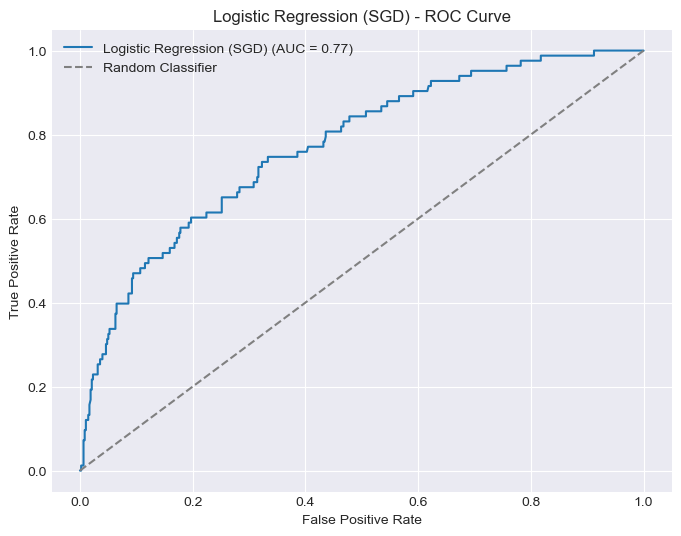

<Figure size 600x500 with 0 Axes>

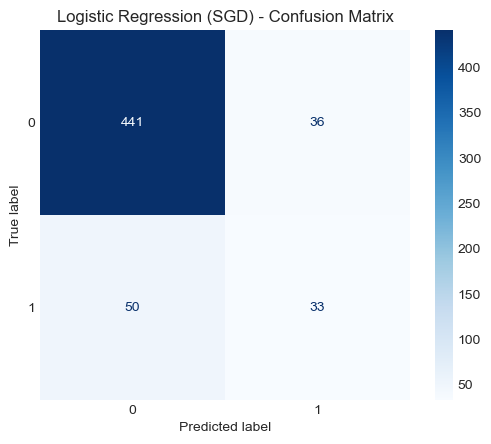

In [12]:
log_reg = BaseClassifier(
SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
"Logistic Regression (SGD)")

log_reg.train(X_train_scaled, y_train)
log_reg.evaluate(X_test_scaled, y_test)

### 2. Untuned Decision Tree
    
Objective: Assess the raw predictive power of a Decision Tree model without any hyperparameter optimization. Decision Trees are non-linear models capable of capturing complex decision rules based on features.
    
Expectation: An untuned Decision Tree might exhibit high variance (overfitting) on the training data, potentially leading to lower generalization performance on unseen test data. However, it will give us an initial sense of its potential and whether tree-based models are suitable for this problem.

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       477
           1       0.40      0.47      0.43        83

    accuracy                           0.82       560
   macro avg       0.65      0.67      0.66       560
weighted avg       0.83      0.82      0.82       560

Accuracy: 0.82
Precision: 0.40
Recall: 0.47
F1 Score: 0.43
ROC AUC: 0.67


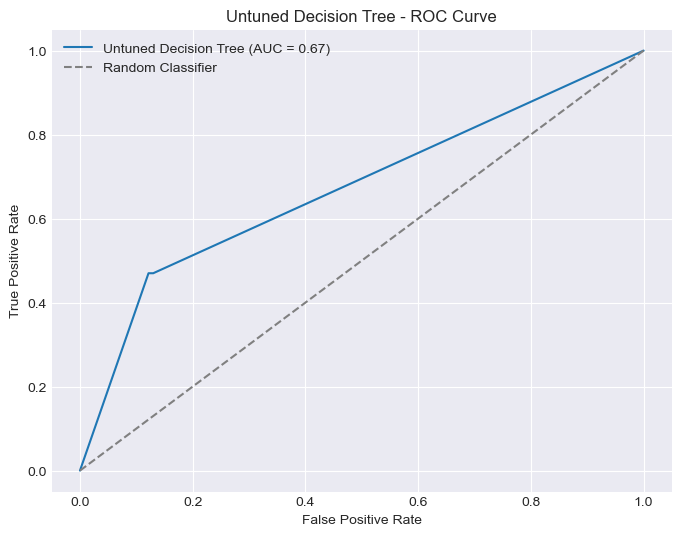

<Figure size 600x500 with 0 Axes>

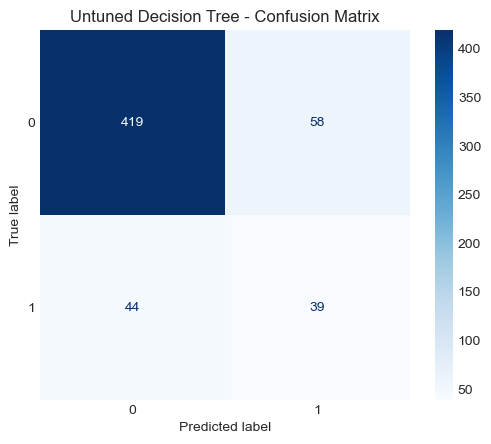

In [13]:
tree_model = BaseClassifier(
DecisionTreeClassifier(random_state=42),
"Untuned Decision Tree")
tree_model.train(X_train_scaled, y_train)
tree_model.evaluate(X_test_scaled, y_test)


### 3. Tuned Decision Tree with Cross-Validation
    
Objective: Optimize the Decision Tree's hyperparameters to maximize its F1-score performance using `GridSearchCV` and 5-fold cross-validation. This aims to find the best balance between bias and variance, preventing overfitting and improving generalization.
    
Parameters Tuned:
* `max_depth`: The maximum depth of the tree. Controls overfitting by limiting the number of splits.
* `min_samples_split`: The minimum number of samples required to split an internal node. Prevents creating splits on very small, noisy subsets.
* `criterion`: The function to measure the quality of a split ('gini' for Gini impurity, 'entropy' for information gain).
    
Scoring Metric:`f1`. This is chosen specifically because our `Response` variable is imbalanced. Optimizing for F1-score ensures we achieve a good balance between precision (minimizing false positives) and recall (minimizing false negatives) for the positive class (responders), which is crucial for effective marketing targeting.

nBest parameters for Tuned Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       477
           1       0.46      0.46      0.46        83

    accuracy                           0.84       560
   macro avg       0.68      0.68      0.68       560
weighted avg       0.84      0.84      0.84       560

Accuracy: 0.84
Precision: 0.46
Recall: 0.46
F1 Score: 0.46
ROC AUC: 0.68


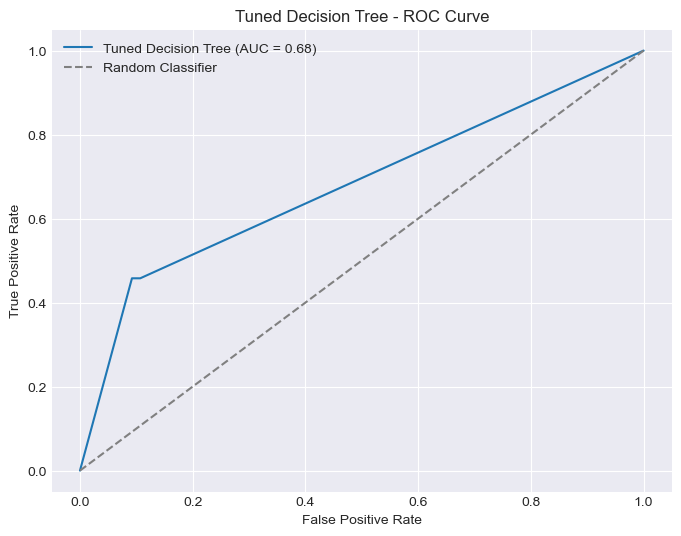

<Figure size 600x500 with 0 Axes>

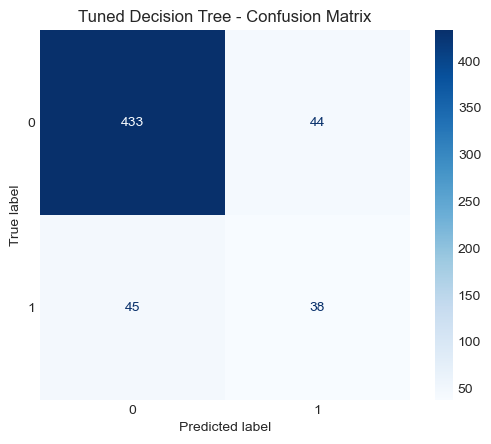

In [14]:
param_grid = {
'max_depth': [3, 5, 10, None], # None means no limit on depth
'min_samples_split': [2, 5, 10],
'criterion': ['gini', 'entropy']}
    
grid = GridSearchCV(
DecisionTreeClassifier(random_state=42),
param_grid,
scoring='f1', # Optimize for F1-score due to class imbalance
cv=5,
n_jobs=-1 )# Use all available CPU cores for faster computation
grid.fit(X_train_scaled, y_train)
    
print(f"nBest parameters for Tuned Decision Tree: {grid.best_params_}")
best_tree = BaseClassifier(grid.best_estimator_, "Tuned Decision Tree")
best_tree.train(X_train_scaled, y_train)
best_tree.evaluate(X_test_scaled, y_test)

## Summary and Recommendations: Actionable Insights for Marketing Success
    
After training and evaluating our three models, we can now compare their performance and draw actionable insights for predicting customer campaign response.
    
### Model Performance Comparison:
    
| Metric         | Logistic Regression (SGD) | Untuned Decision Tree | Tuned Decision Tree |
| :------------- | :------------------------ | :-------------------- | :------------------ |
| **Accuracy** | 0.85                      | 0.82                  | 0.84                |
| **Precision (Class 1)** | 0.48                      | 0.40                  | 0.46                |
| **Recall (Class 1)** | 0.40                      | 0.47                  | 0.46                |
| **F1 Score (Class 1)** | 0.43                      | 0.43                  | 0.46                |
| **ROC AUC** | 0.77                      | 0.67                  | 0.68                |

### Key Takeaways from Model Evaluation:
    
* Class Imbalance Impact: The `Response` variable's imbalance (approximately 15% responders) means that simple accuracy can be misleading. A model could achieve high accuracy by simply predicting 'non-responder' for most cases. Therefore, `F1-score`, `Precision`, and `Recall` for the positive class (responders) are more indicative of real-world utility.
    
* Tuned Decision Tree Leads: The **Tuned Decision Tree** model demonstrates the most balanced performance for identifying responders, achieving the highest F1-score (0.46). This indicates it strikes the best compromise between minimizing false positives (predicting a responder when they aren't) and false negatives (missing an actual responder).
* While Logistic Regression had a slightly higher ROC AUC, its lower F1-score suggests it's less effective at directly optimizing for the identification of positive responses compared to the tuned Decision Tree.
    
* Challenges in Prediction: It's important to note that even the best model achieved an F1-score of 0.46 for the positive class. This suggests that predicting campaign response is an inherently challenging task, likely due to the complexity of human behavior and potentially missing external factors not captured in the dataset.
    
### Actionable Recommendations for Enhancing Marketing Strategy:

Based on our findings, here are concrete recommendations for leveraging this predictive model in a real-time marketing context:
    
1.  Strategic Deployment of Tuned Decision Tree:
* Action: Implement the Tuned Decision Tree model for scoring customer lists *before* campaign launch.
* Impact: This will identify customers with the highest predicted probability of responding. Marketing teams can then focus their efforts and resources on these high-potential segments.
* Example: For a new campaign, run the customer database through the model. Only target customers with a predicted `Response` probability above a predefined threshold (e.g., > 0.5 or > 0.6, depending on risk tolerance).
    
2. Optimize Marketing Spend and Reduce Waste:
Action: Divert budget away from customers predicted to be non-responders.
Impact: Significant cost savings on campaign execution (e.g., printing, mailing, ad impressions). This reallocated budget can then be invested in more targeted efforts or other profitable areas.
    
3.  A/B Testing for Threshold Optimization:
Action: Do not rely on a single, fixed probability threshold for campaign targeting immediately. Instead, run A/B tests with different thresholds (e.g., one group targeted with probability > 0.5, another with > 0.6).
Impact: Empirically determine the optimal threshold that balances the cost of contacting non-responders (false positives) against the value of capturing every potential responder (avoiding false negatives).
    
4.  Derive and Utilize Feature Importances:
Action: Analyze the feature importances from the trained Decision Tree (e.g., `model.feature_importances_`).
Impact: Gain insights into why certain customers are predicted to respond. For example, if `MntWines` (amount spent on wines) or `AcceptedCmpX` (past campaign acceptance) are high-importance features, this suggests that past purchasing behavior and prior responsiveness are key drivers. This information can guide creative development, messaging, and product recommendations.
Example: If `Recency` is a top feature, marketers should prioritize recently active customers. If `Income` is important, segment campaigns by income brackets

In [15]:
!pip install nbconvert

  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.1.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached nbconvert-7.16.6-py3-none-any.whl (258 kB)
Using cached mistune-3.1.3-py3-none-any.whl (53 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached pandocfilters-1.5.1-py2.py3-none-any.whl (8.7 kB)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
Using cached defusedx